In [25]:
import numpy as np
import pandas as pd

In [26]:
df_Q3 = pd.read_csv("/Users/snowe/Desktop/Tech_Workers_Mental_Health/Data/Q3.csv")
df_Q3.head(5)

,Survey Year,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What is your race?,What country do you work in?,What US state or territory do you work in?,Describe the circumstances of the badly handled or unsupportive response.
0,2017,0,100-500,1.0,1.0,No,Yes,27.0,Female,United Kingdom,NaN,NaN,United Kingdom,NaN,NaN
1,2017,0,100-500,1.0,1.0,Yes,Yes,31.0,Male,United Kingdom,NaN,NaN,United Kingdom,NaN,"During a discussion about ""mental health first..."
2,2017,0,6-25,1.0,1.0,I don't know,No,36.0,Male,United States of America,Missouri,White,United States of America,Missouri,I was suffering depression and I was open abou...
3,2017,0,More than 1000,1.0,1.0,Yes,Yes,22.0,Male,United States of America,Washington,White,United States of America,Washington,NaN
4,2017,0,100-500,1.0,0.0,Yes,No,30.0,Male,United States of America,California,White,United States of America,California,NaN


In [27]:
Q3 = df_Q3.iloc[:,-1]

In [28]:
Q3 = Q3.to_frame()

In [29]:
Q3 = Q3.dropna()

In [30]:
Q3.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343 entries, 1 to 1576
Columns: 1 entries, Describe the circumstances of the badly handled or unsupportive response. to Describe the circumstances of the badly handled or unsupportive response.
dtypes: object(1)
memory usage: 5.4+ KB


In [31]:
Q3 = [i for i in Q3.iloc[:,0]]

In [32]:
Q3

['During a discussion about "mental health first aider" at work, a coworker dismissed the whole idea, saying that "no one here suffers from Mental Health Disorder"',
 'I was suffering depression and I was open about that, that is why my numbers fell, but then I started drinking too much and admitted myself into a detox/psych facility to get better... 5 days later I get out to find myself fired',
 'Was told it does not matter.  ',
 "Several times I've seen people with depression or other mental problems be fired rather then the employer be supportive and try to deal with/help that person. ",
 "A coworker that doesn't get along with me has used my illness and medication as a reason that I couldn't work through issues with them",
 'they told iresposible',
 'There was a former coworker who lost a baby and was likely suffering from PTSD and my employer did not handle her suffering or mental health status well.',
 'A new hire exhibited symptoms and was summarily fired..."Just get them out of

In [33]:
import string
#import packages from nltk
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import FreqDist
#import gensim and packages
import gensim
from gensim import corpora

In [34]:
#check the most frequent words
NLTK_stopwords = stopwords.words('english')

text = [word for line in Q3 for word in line.split() 
        if word not in NLTK_stopwords]
fdist = FreqDist(text)
k = 20
top_k_words, _ = zip(*fdist.most_common(k))
print(top_k_words)

('I', 'mental', 'health', 'work', 'person', 'people', 'A', 'told', 'previous', 'manager', 'coworker', 'issues', 'fired', 'made', 'The', 'employee', 'depression', 'time', 'job', 'would')


In [35]:
#create a custom stopwords list
custom_stopwords = ['I', 'mental', 'health', 'work', 
                    'person', 'people', 'A', 'told', 
                    'previous', 'manager', 'coworker', 'issues', 
                   'made', 'The', 'employee','time', 'job', 'would',
                   'employer']

stop = NLTK_stopwords + custom_stopwords

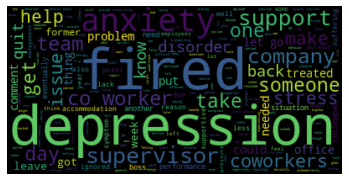

In [36]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

textQ3 = " ".join(i for i in Q3)
wordcloudQ3 = WordCloud(stopwords = stop).generate(textQ3)

plt.imshow(wordcloudQ3, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloudQ3.png')
plt.show()

In [37]:
import spacy
nlp = spacy.load("en_core_web_sm")
nlp.max_length = 1850000

In [40]:
all_text = df_Q3.iloc[:,-1].str.cat(sep = ' ')

In [41]:
doc_Q3 = nlp(all_text, disable = ['ner'])

In [42]:
from collections import Counter

words_original = [token.lemma_ for token in doc_Q3 
                  if not token.is_stop and not token.is_punct]
words = [word for word in words_original if word not in stop]
word_freq = Counter(words) 
word_freq.most_common(20)

[(' ', 84),
 ('issue', 59),
 ('fire', 36),
 ('tell', 36),
 ('leave', 30),
 ('depression', 28),
 ('support', 28),
 ('need', 26),
 ('anxiety', 25),
 ('know', 22),
 ('worker', 22),
 ('supervisor', 21),
 ('company', 21),
 ('co', 20),
 ('treat', 19),
 ('talk', 19),
 ('team', 19),
 ('stress', 19),
 ('day', 17),
 ('let', 17)]

In [43]:
from spacy.matcher import Matcher 

matcher = Matcher(nlp.vocab) 
pattern = [{'POS':'ADJ'}, {'POS':'NOUN'}] 
matcher.add('ADJ_PHRASE', [pattern]) 

matches = matcher(doc_Q3, as_spans=True) 
phrases = [] 
for span in matches:
    phrases.append(span.text.lower())
    phrase_freq = Counter(phrases)

phrase_freq.most_common(10)

[('mental health', 54),
 ('previous job', 10),
 ('previous employer', 7),
 ('medical leave', 6),
 ('former coworker', 5),
 ('mental illness', 4),
 ('previous workplace', 4),
 ('other people', 4),
 ('previous employers', 3),
 ('new manager', 3)]

In [45]:
from spacy.matcher import PhraseMatcher
mental_health_colloc = []
matcher = PhraseMatcher(nlp.vocab, attr = 'LOWER') 
# The attr above ensures all instances are converted to lower-case so the search is case-insensitive
pattern = [nlp.make_doc('fired')]
matcher.add('fired', pattern)
matches = matcher(doc_Q3)

for match_id, start, end in matches:
    span = doc_Q3[start-15 : end+15]   
    mental_health_colloc.extend([token.lemma_.lower() for token 
                                 in span if not token.is_stop 
                                 and not token.is_punct]) 

Counter(mental_health_colloc).most_common(20)

[('fire', 33),
 ('mental', 12),
 ('issue', 11),
 ('person', 9),
 (' ', 8),
 ('employee', 8),
 ('people', 7),
 ('health', 7),
 ('tell', 5),
 ('disorder', 5),
 ('coworker', 5),
 ('week', 5),
 ('previous', 5),
 ('day', 4),
 ('time', 4),
 ('see', 4),
 ('employer', 4),
 ('work', 4),
 ('got', 4),
 ('  ', 3)]

In [44]:
from nltk.corpus import stopwords

NLTK_stop = stopwords.words('english')
custom_stopwords = ['to','and','was','the',
                    'of','my','that','not', 
                    'mental','for']
stop = set(NLTK_stop + custom_stopwords)

def remove_stopwords(data):
    output_list = []
    for sentence in data:
        temp_list = []
        for word in sentence.split():
            if word.lower() not in stop:
                temp_list.append(word)
        output_list.append(' '.join(temp_list))
    return output_list

doc = remove_stopwords(Q3)

print(doc)

['discussion "mental health first aider" work, coworker dismissed whole idea, saying "no one suffers Health Disorder"', 'suffering depression open that, numbers fell, started drinking much admitted detox/psych facility get better... 5 days later get find fired', 'told matter.', "Several times I've seen people depression problems fired rather employer supportive try deal with/help person.", 'coworker get along used illness medication reason work issues', 'told iresposible', 'former coworker lost baby likely suffering PTSD employer handle suffering health status well.', 'new hire exhibited symptoms summarily fired..."Just get here"', "work college, know staff dismissive current students' health issues inclined deny admission, claiming might resources support students certain health issues.", 'person treated differently thereafter, oddity attributed illness.', 'Someone timid others result social anxiety. person male ridiculed relentlessly.', 'Poorly handled reactions suicide prevent it.',

In [46]:
from bertopic import BERTopic

model = BERTopic(verbose=True)
topics, probabilities = model.fit_transform(doc)

2022-04-26 00:26:30,137 - BERTopic - Transformed documents to Embeddings


2022-04-26 00:26:32,315 - BERTopic - Reduced dimensionality with UMAP
2022-04-26 00:26:32,332 - BERTopic - Clustered UMAP embeddings with HDBSCAN


In [47]:
model.get_topic_freq().head(5)

,Topic,Count
0,0,325
1,1,18


In [48]:
model.get_topic(0)

[('health', 0.05109070649832585),
 ('work', 0.048617458782276184),
 ('person', 0.04413679098076019),
 ('people', 0.04347958198535525),
 ('issues', 0.03943721266157415),
 ('coworker', 0.0387459349533087),
 ('manager', 0.03374941017070533),
 ('previous', 0.032266369302786424),
 ('fired', 0.029989833012442672),
 ('job', 0.029989833012442672)]

In [49]:
model.get_topic(1)

[('na', 0.5587773056094613),
 ('prefer', 0.5587773056094613),
 ('dont', 0.503399570966341),
 ('care', 0.4855850810815167),
 ('didnt', 0.3070960172205923),
 ('yes', 0.3070960172205923),
 ('pass', 0.3070960172205923),
 ('already', 0.3070960172205923),
 ('nah', 0.3070960172205923),
 ('thanks', 0.3070960172205923)]